In [ ]:
import os
Root = "/content/drive/MyDrive/Biển báo giao thông"
os.chdir(Root)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==1.14.0
2.15.0


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [ ]:
data_dir = "/content/drive/MyDrive/Biển báo giao thông"
train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

44

In [ ]:
# Label Overview
classes = { 0:'Giới hạn tốc độ (20km/h)',
            1:'Giới hạn tốc độ (30km/h)',
            2:'Giới hạn tốc độ (50km/h)',
            3:'Giới hạn tốc độ (60km/h)',
            4:'Giới hạn tốc độ (70km/h)',
            5:'Giới hạn tốc độ (80km/h)',
            6:'Hết giới hạn tốc độ (80km/h)',
            7:'Giới hạn tốc độ (100km/h)',
            8:'Giới hạn tốc độ (120km/h)',
            9:'Không ',
            10:'Cấm vượt xe trên 3,5 tấn',
            11:'Quyền ưu tiên tại giao lộ',
            12:'Đường ưu tiên',
            13:'Biển nhường đường',
            14:'Stop',
            15:'Cấm đỗ xe',
            16:'Cấm xe > 3,5 ',
            17:'Đường một chiều',
            18:'Nguy Hiểm',
            19:'Nguy hiểm rẽ trái',
            20:'Nguy Hiểm rẽ phải',
            21:'Đường ngoằn ngoèo ',
            22:'Đường gập ghềnh',
            23:'Đường trơn',
            24:'Đường hẹp bên phải',
            25:'Đường đang thi ',
            26:'Đèn giao ',
            27:'Người đi bộ',
            28:'Trẻ em qua đường',
            29:'Xe đạp qua đường',
            30:'Coi trừng băng tuyết',
            31:'Động vật băng ',
            32:'Hết mọi lệnh cấm',
            33:'Rẽ phải về phía trước',
            34:'Rẽ trái về phía trước',
            35:'Chỉ được đi thẳng',
            36:'Đi thằng hoặc rẽ phải',
            37:'Đi thằng hoặc rẽ trái',
            38:'Đi bên phải',
            39:'Đi bên trái',
            40:'Vòng xuyến',
            41:'Kết thúc không đi qua',
            42:'tonsXe không vợt quá 3,5 tấn' }

Đoạn mã dưới thực hiện các bước để đếm và trực quan hóa số lượng hình ảnh trong từng lớp của tập dữ liệu huấn luyện.

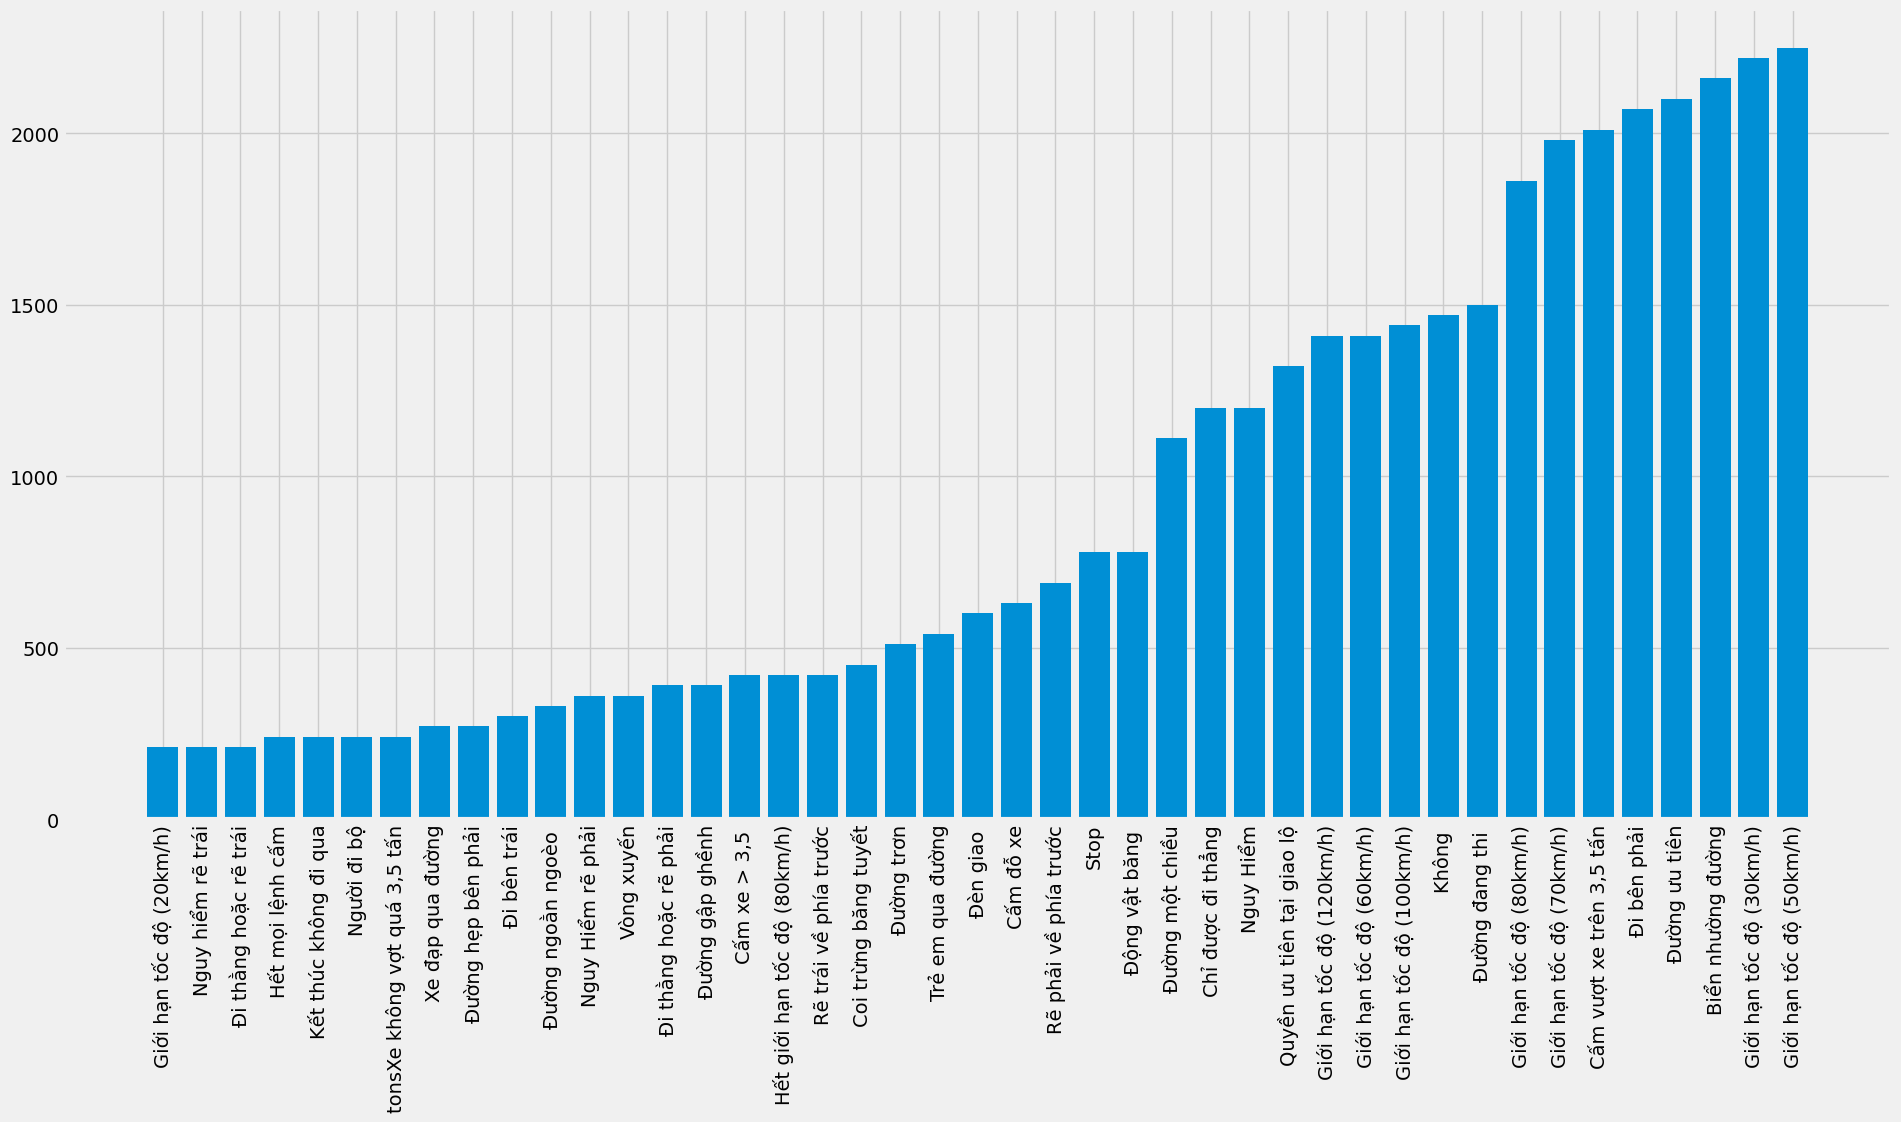

In [ ]:
folders = [folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder))]

train_number = []
class_num = []

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    train_files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sắp xếp tập dữ liệu dựa trên số lượng hình ảnh trong mỗi lớp
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [list(tuple) for tuple in tuples]

# Vẽ biểu đồ số lượng hình ảnh trong mỗi lớp
plt.figure(figsize=(21, 10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

Đoạn mã dưới thực hiện việc trực quan hóa 25 hình ảnh ngẫu nhiên từ dữ liệu kiểm tra.

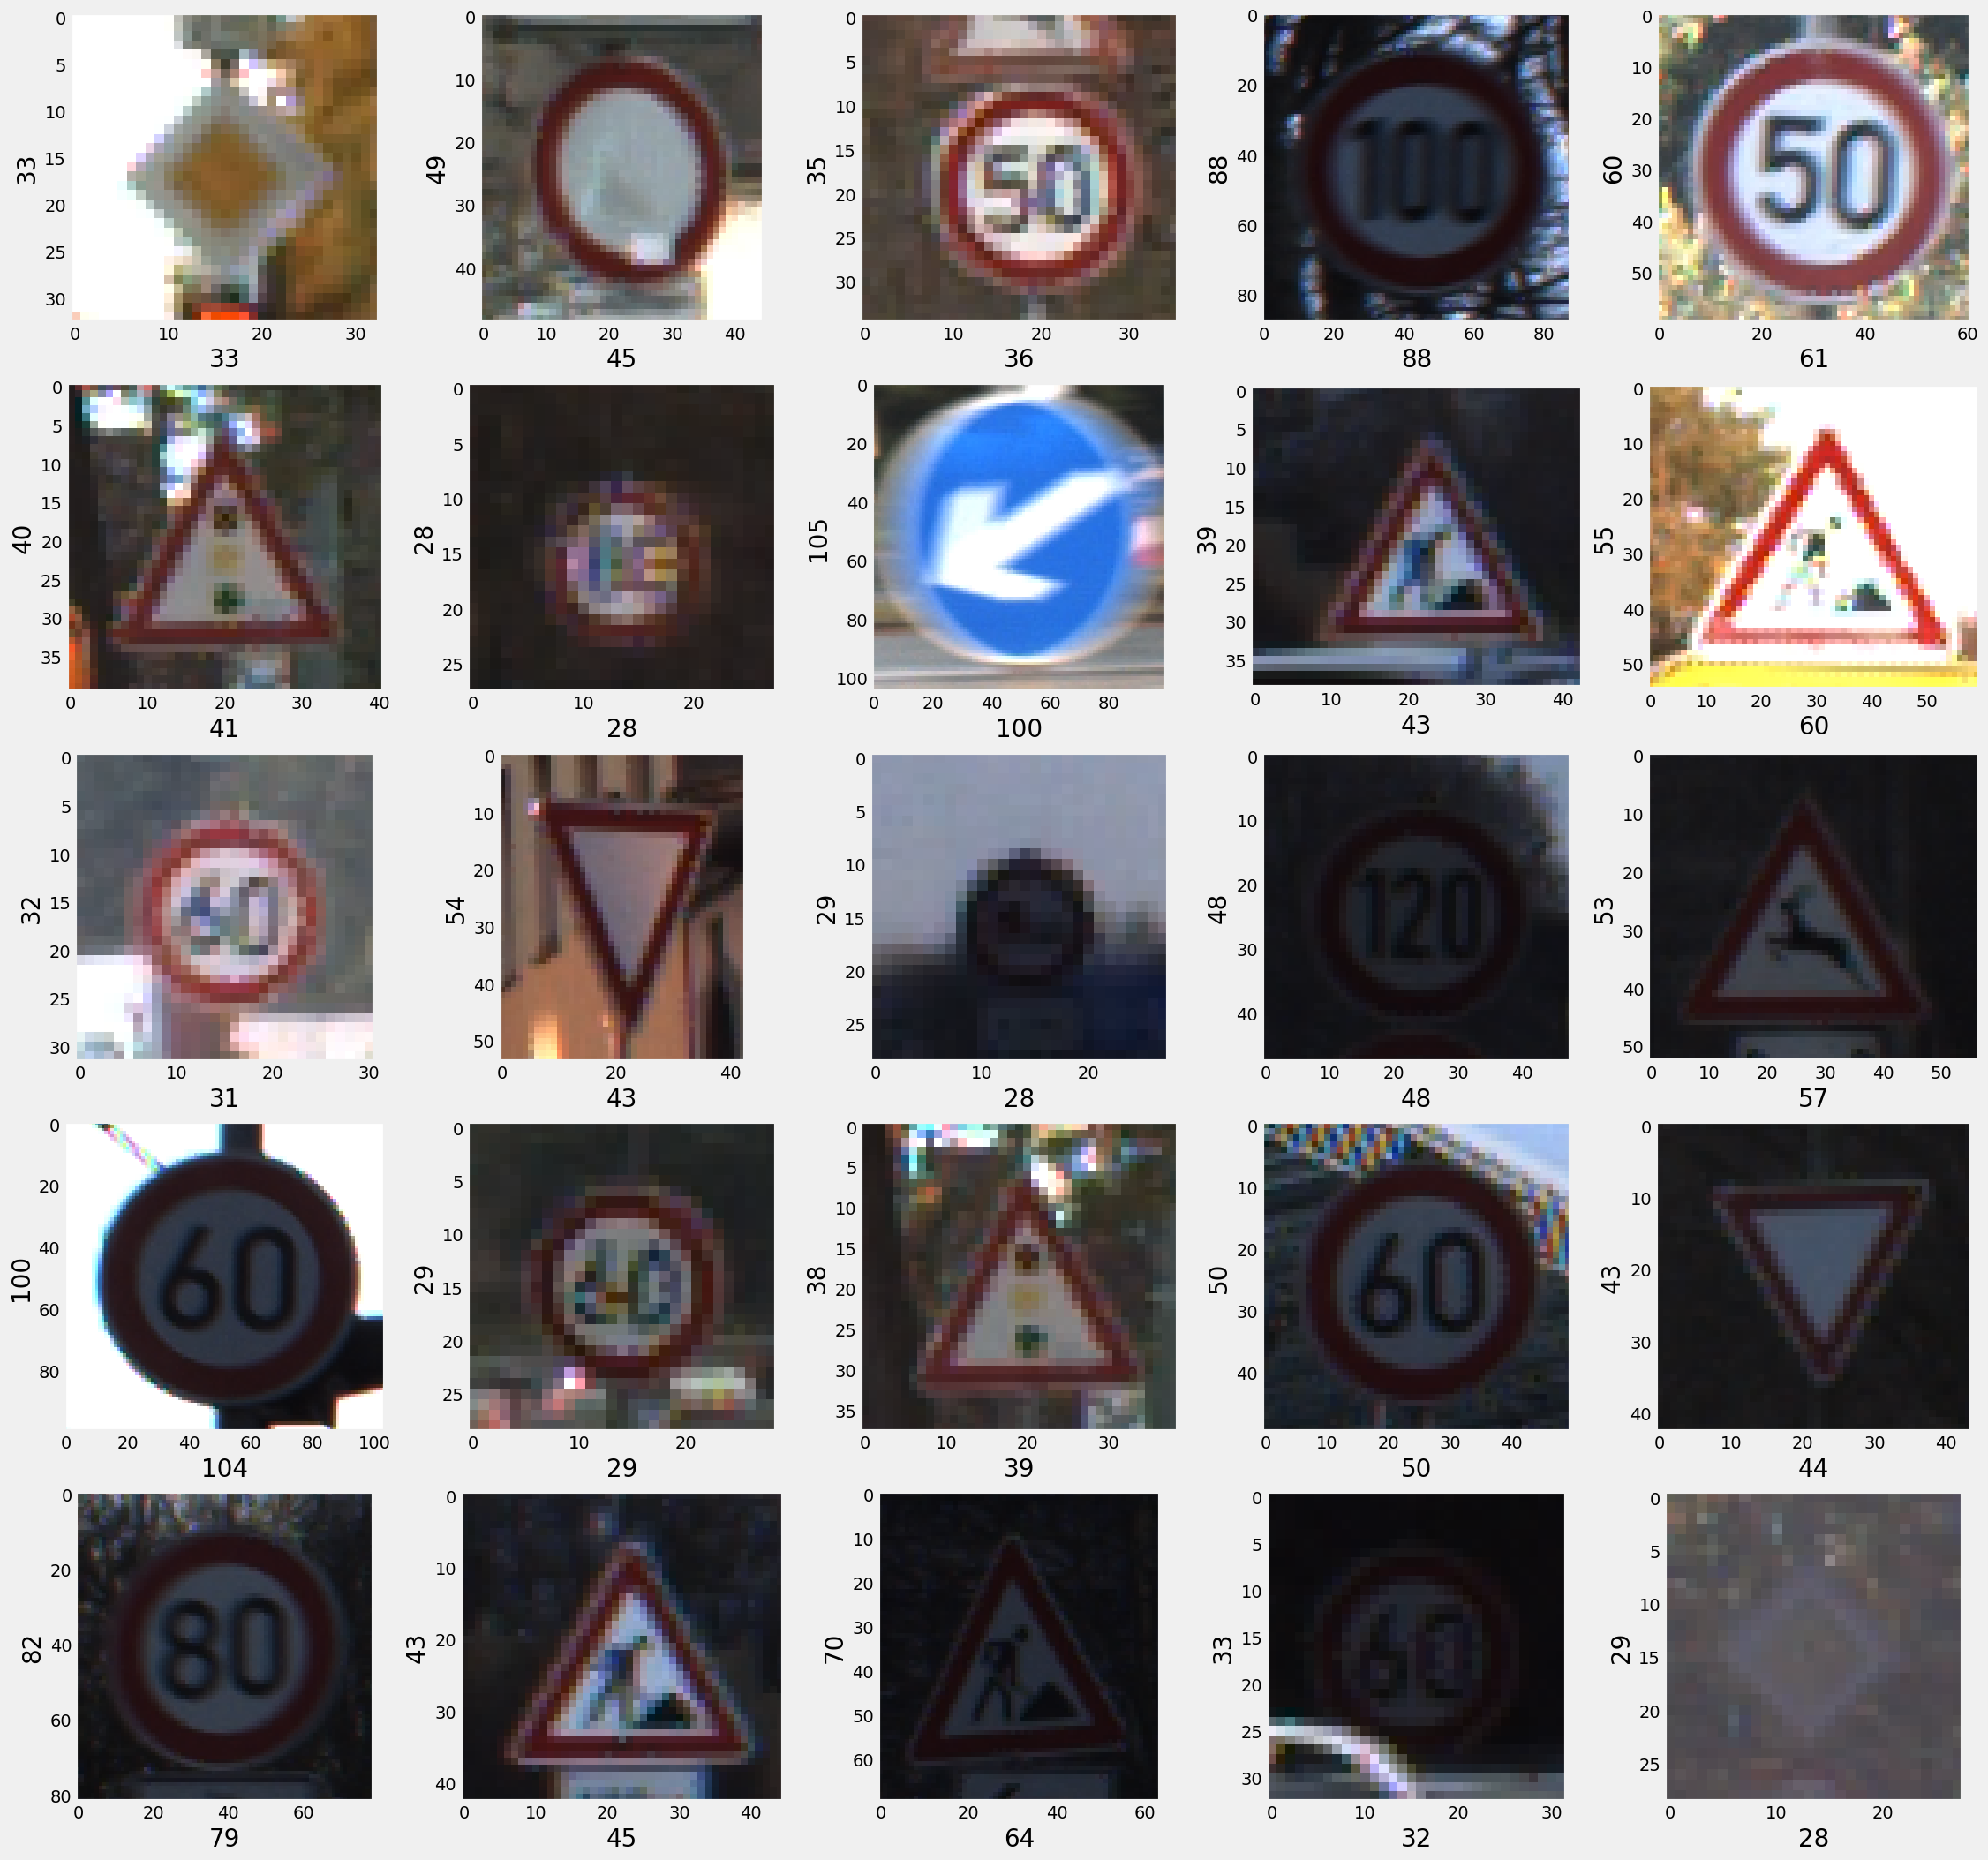

In [ ]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(False)  # Tắt lưới
    plt.xlabel(rand_img.shape[1], fontsize = 20)  # Chiều rộng của ảnh
    plt.ylabel(rand_img.shape[0], fontsize = 20)  # Chiều cao của ảnh

Đoạn mã dưới thực hiện việc đọc và xử lý dữ liệu hình ảnh từ thư mục huấn luyện để chuẩn bị cho việc huấn luyện mô hình

In [ ]:
image_data = []  # Để lưu trữ hình ảnh đã thay đổi kích thước
image_labels = []  # Để lưu trữ nhãn tương ứng

for i in range(NUM_CATEGORIES):
    path = os.path.join(data_dir, 'Train', str(i))
    if os.path.exists(path):  # Kiểm tra xem thư mục tồn tại hay không
        images = os.listdir(path)

        for img in images:
            try:
                # Đọc, thay đổi kích thước và chuyển đổi hình ảnh thành mảng
                image = cv2.imread(os.path.join(path, img))
                image_fromarray = Image.fromarray(image, 'RGB')
                resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
                image_data.append(np.array(resize_image))

                # Thêm nhãn cho hình ảnh hiện tại
                image_labels.append(i)
            except:
                print("Lỗi trong " + img)

# Chuyển đổi danh sách thành mảng NumPy
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# In hình dạng của các mảng kết quả
print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


Các dòng mã dưới thực hiện việc xáo trộn dữ liệu hình ảnh và nhãn để đảm bảo rằng dữ liệu trong các lớp được phân phối ngẫu nhiên

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

Các dòng mã dưới thực hiện việc chia dữ liệu thành tập huấn luyện và tập kiểm tra, sau đó chuẩn hóa dữ liệu hình ảnh

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


Các dòng mã dưới thực hiện chuyển đổi nhãn (labels) từ dạng số nguyên sang dạng one-hot vector, sử dụng hàm to_categorical() từ thư viện Keras

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 44)
(11763, 44)


In [ ]:
NUM_CLASSES = 44  # Thay thế 44 bằng số lượng lớp thực tế trong dữ liệu nhãn của bạn

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

Mã dưới định nghĩa một mô hình mạng nơ-ron sử dụng thư viện Keras để nhận dạng biển báo giao thông

In [ ]:
lr = 0.001
epochs = 30

opt = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Mã dưới sử dụng ImageDataGenerator để tạo ra dữ liệu tăng cường và sau đó huấn luyện mô hình với dữ liệu đã tăng cường

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [ ]:
# history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

In [ ]:
# model.save("model_test.h5")

In [ ]:
# model.save_weights("/content/drive/MyDrive/Data full")

In [ ]:
dir(aug)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standardize',
 'std',
 'vertica

Đoạn mã dưới được sử dụng để trực quan hóa thông tin về quá trình huấn luyện của mô hình bằng biểu đồ.

In [ ]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1)
# plt.show()

In [ ]:
# Đánh giá độ chính xác của mô hình trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)

368/368 [==============================] - 10s 24ms/step - loss: 3.7778 - accuracy: 0.0503
Độ chính xác trên tập kiểm tra: 0.05032729730010033


In [ ]:
from tensorflow.keras.models import load_model

# Tải mô hình từ tệp lưu trữ
model = load_model("model_test.h5")

# Load dữ liệu kiểm tra từ tệp CSV
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values

data = []

# Đọc và xử lý dữ liệu hình ảnh kiểm tra
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

X_test = np.array(data) / 255

# Dự đoán với dữ liệu kiểm tra
pred = np.argmax(model.predict(X_test), axis=-1)

# Đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra
from sklearn.metrics import accuracy_score
print('Test Data accuracy: ', accuracy_score(labels, pred) * 100)

395/395 [==============================] - 14s 36ms/step
Test Data accuracy:  2.525732383214568


Đoạn mã dưới được sử dụng để đánh giá độ chính xác của mô hình trên dữ liệu kiểm tra.

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred) * 100)

395/395 [==============================] - 10s 27ms/step
Test Data accuracy:  2.525732383214568


Dòng mã trên sử dụng thư viện Scikit-learn để tính ma trận nhầm lẫn (confusion matrix) dựa trên các nhãn thực tế và nhãn dự đoán từ mô hình

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

Đoạn mã trên sử dụng Matplotlib để hiển thị 25 hình ảnh từ dữ liệu kiểm tra cùng với dự đoán của mô hình và nhãn thực tế. Mỗi hình ảnh được chia thành một lưới 5x5 trên biểu đồ.

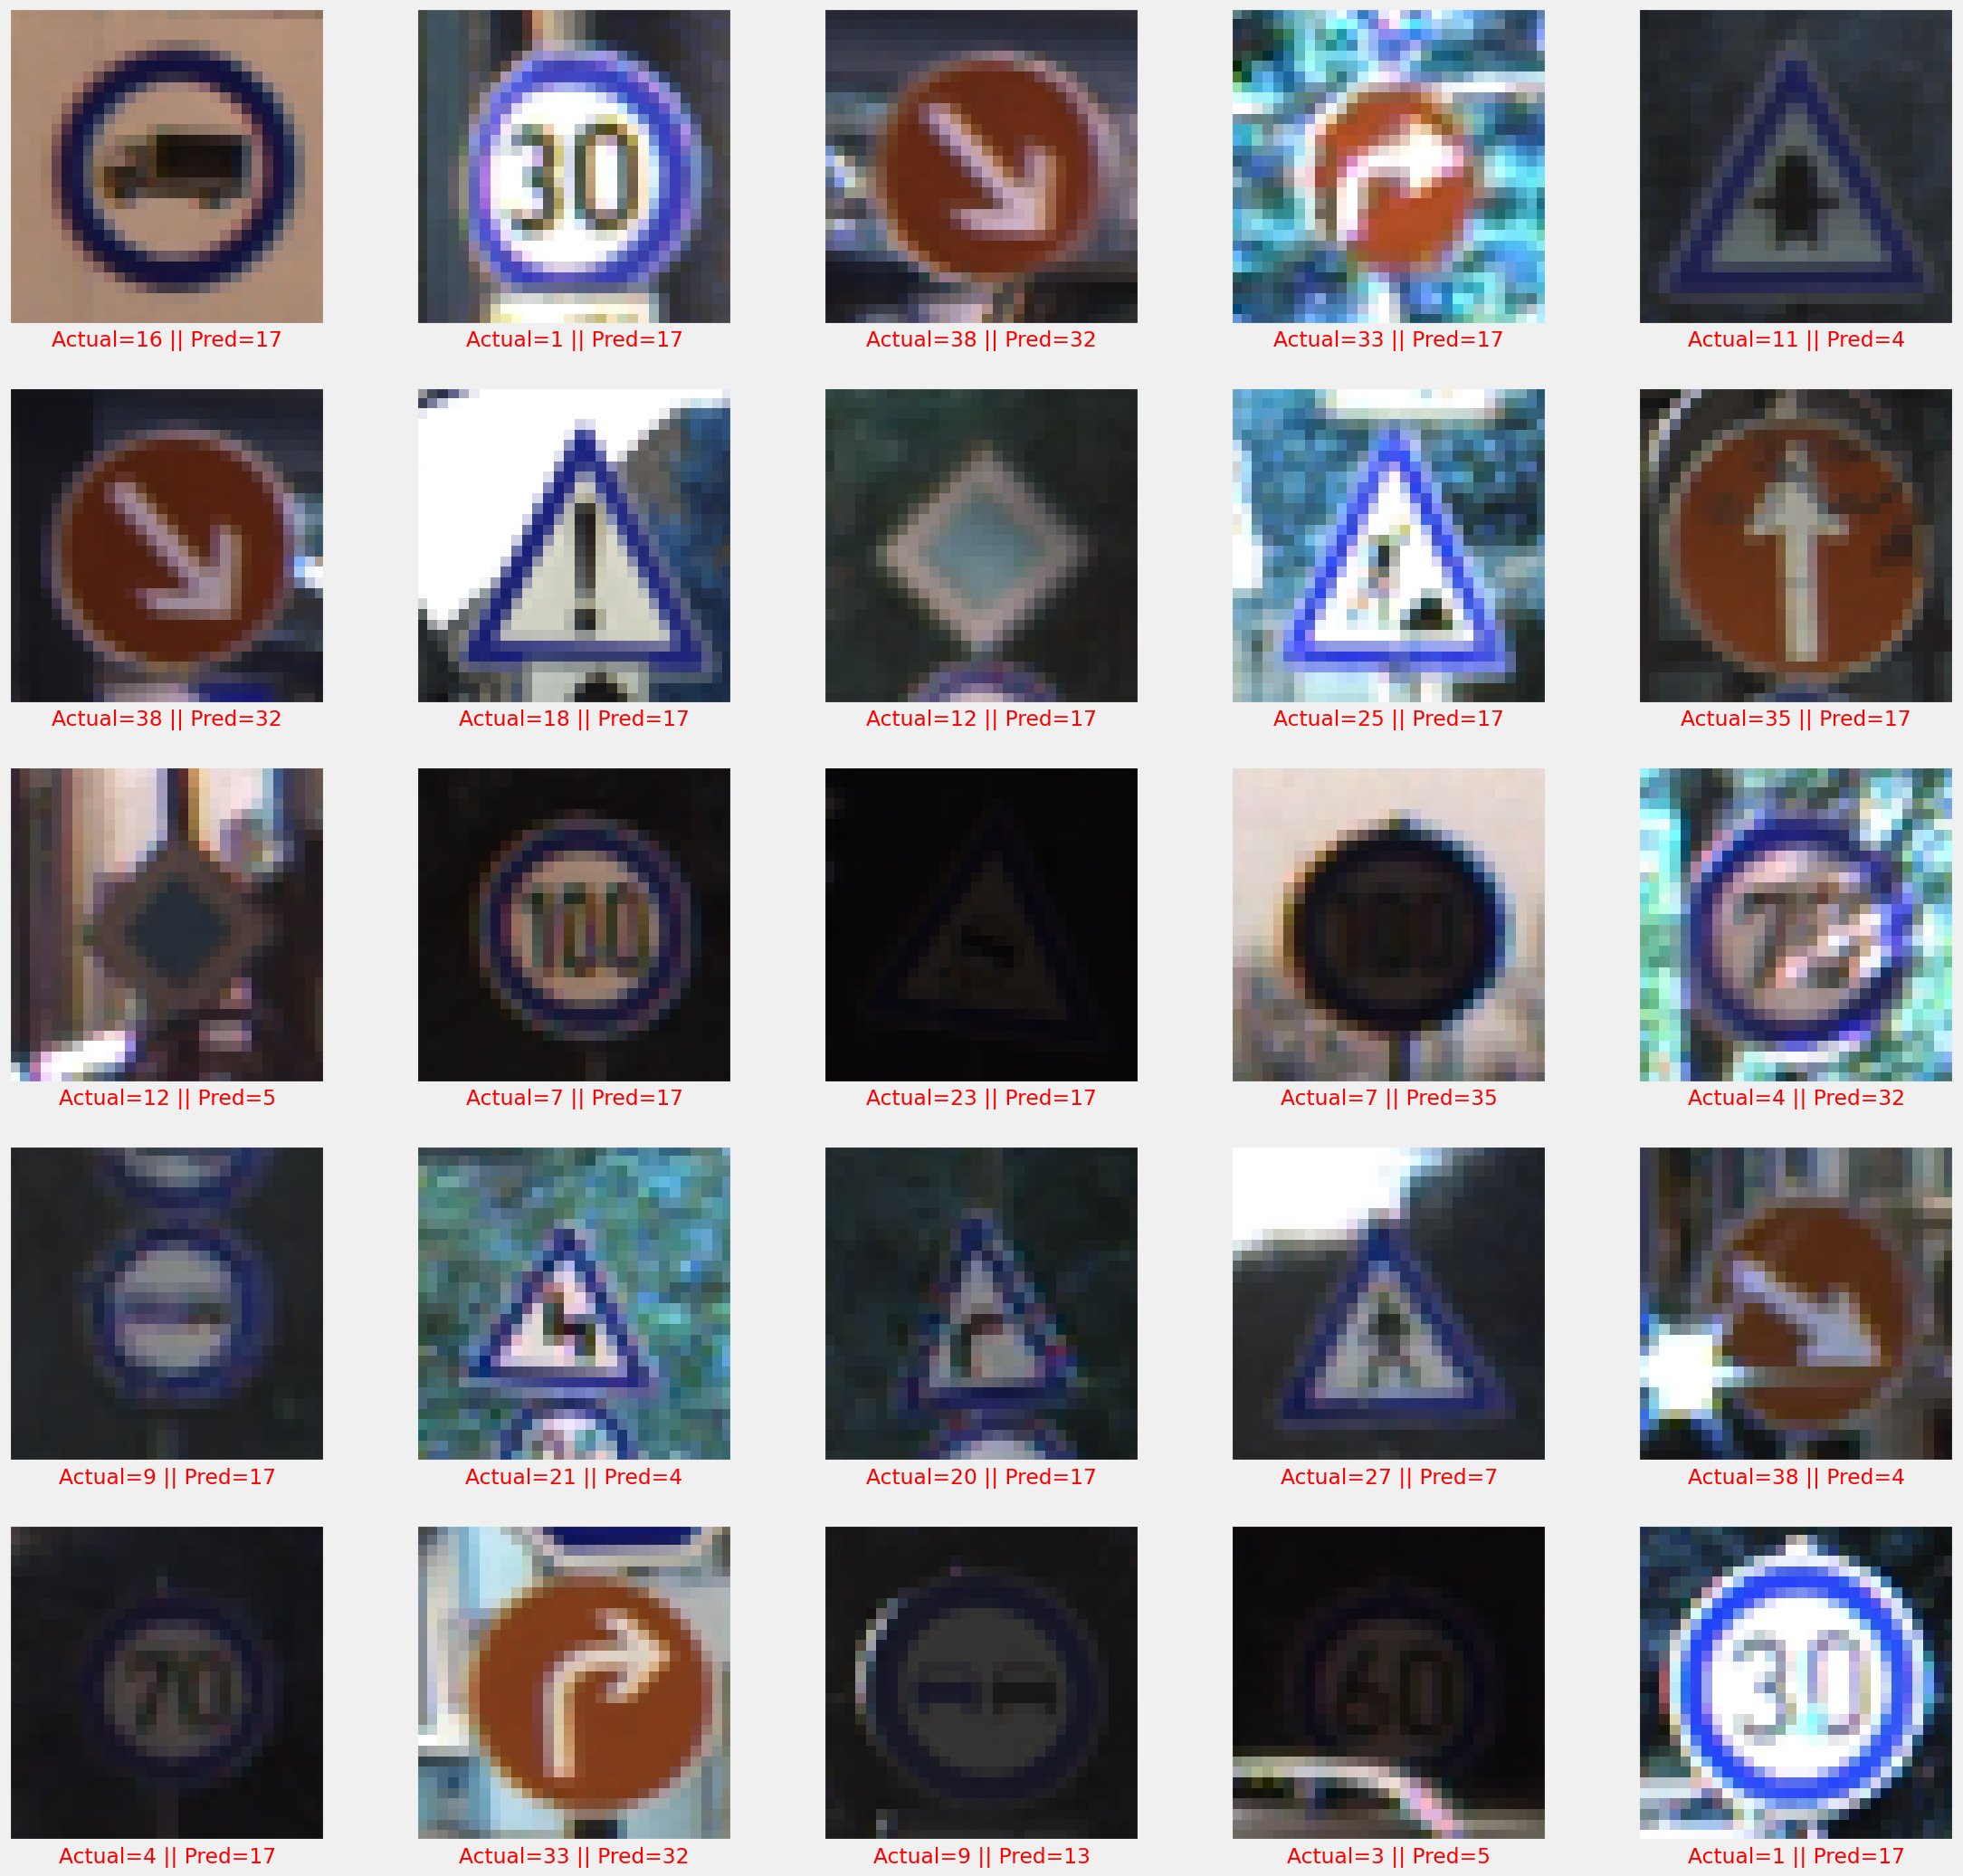

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [1]:
ls

drive/  sample_data/


In [2]:
model_path = "model_test.h5"
loaded_model = tf.keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("/content/drive/MyDrive/Biển báo giao thông/Test_1.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
# Hiển thị hình ảnh
plt.imshow(resize_image)
plt.axis('off')
plt.show()
# In ra tên của biển báo giao thông
sign_name = classes[result]
print("Tên biển báo giao thông:", sign_name)

NameError: name 'tf' is not defined